Import pandas to work with dataframe.
Import the visualisation libraries ( matplotlib and seaborn )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the csv file with collected data and check the information.

In [47]:
df=pd.read_csv('final_db_2.csv')

In [48]:
df.head()

,author,comments,domain,flair,score,text,title,url
0,india_ko_vanakkam,"\nModi has Stockholm syndrome\nTo be fair, the...",self.india,AskIndia,91,> We are getting frantic calls from our pharma...,4 days ago we had pending orders of 100 millio...,https://www.reddit.com/r/india/comments/fwjdqr...
1,__knockknockturnal__,\nSomeone matched with me just to tell me that...,self.india,AskIndia,18,I'd my own stint with these apps(a couple of m...,Randians who were big time users of dating app...,https://www.reddit.com/r/india/comments/fizkkk...
2,Dev1003,\nI haven't found a Indian yet who believes ea...,self.india,AskIndia,6,"I encountered a Foreigner in IG who says "" Rou...",What does r/India thinks about the Flat Earthers?,https://www.reddit.com/r/india/comments/f25vx0...
3,c0mrade34,"\nAn Engineer, doing advertisement shoots sinc...",self.india,AskIndia,47,Couldn't add AskIndia flair from the mobile br...,People who left their 9 to 5 jobs to pursue a ...,https://www.reddit.com/r/india/comments/dtvliq...
4,amitkumarthakur,\nCalm down.\nGo to the SP office of your town...,self.india,AskIndia,96,"It's now 24hrs, But local police station is no...",Somebody want to kill my full family what to do?,https://www.reddit.com/r/india/comments/b7pvwt...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19916 entries, 0 to 19915
Data columns (total 8 columns):
author      19916 non-null object
comments    14686 non-null object
domain      19916 non-null object
flair       19916 non-null object
score       19916 non-null int64
text        7923 non-null object
title       19916 non-null object
url         19916 non-null object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


Here we can see that there are many posts that do not have text. Therefore, it is probable that text is not a really good attribute to classify the flair on. Also, comments has a similar case.
The author is a proper noun and can hardly be expected to useful in contributing to detect the flairs.

In [50]:
df.describe()

,score
count,19916.000000
mean,49.395662
std,337.359696
min,0.000000
25%,1.000000
50%,6.000000
75%,26.000000
max,17875.000000


Let us see and group our dataset by flair

In [51]:
df.groupby('flair').describe()

score                                                 \
                     count        mean         std  min  25%   50%    75%   
flair                                                                       
AskIndia            2442.0   32.074120  511.083303  0.0  1.0   5.0  16.00   
Business/Finance    2433.0   31.290588  109.141155  0.0  1.0   3.0  25.00   
Food                1273.0  107.946583  522.148341  0.0  1.0  11.0  59.00   
Non-Political       2416.0   28.803808   87.932854  0.0  1.0   5.0  21.00   
Photography          651.0   79.901690  303.400167  0.0  1.0   9.0  35.00   
Policy/Economy      2220.0   31.254054   82.185160  0.0  1.0   8.0  29.00   
Politics            2448.0   75.623366  346.734783  0.0  1.0   6.0  35.25   
Scheduled           1484.0   38.899596  125.743507  0.0  2.0   9.0  34.00   
Science/Technology  2117.0   50.529523  562.176246  0.0  1.0   5.0  25.00   
Sports              2432.0   62.121299  258.789378  0.0  1.0   4.0  23.00   

                             
                        max  
flair                        
AskIndia            17866.0  
Business/Finance     2622.0  
Food                10047.0  
Non-Political        1596.0  
Photography          3953.0  
Policy/Economy       2015.0  
Politics            11712.0  
Scheduled            2603.0  
Science/Technology  17875.0  
Sports               3542.0

Let us add textlength and title length to the dataframe and see if we can get any information.

In [52]:
df['text_len']=df['text'].apply(str).apply(len)
df['title_len']=df['title'].apply(str).apply(len)

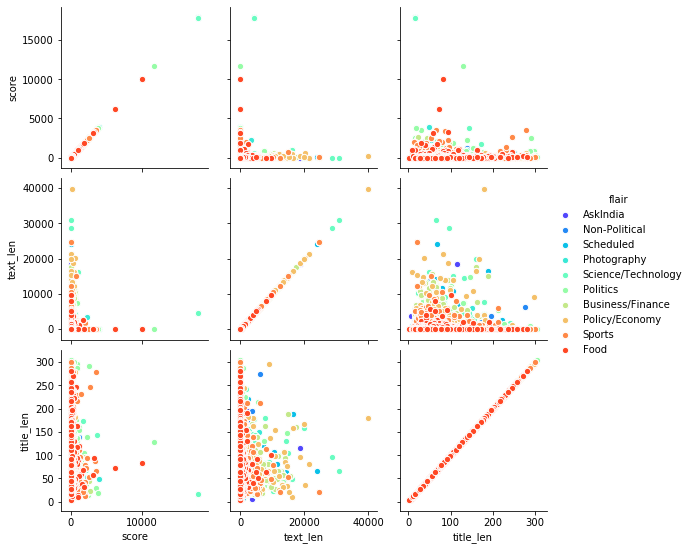

In [53]:
g = sns.PairGrid(df,hue='flair',palette='rainbow')
g=g.map(plt.scatter,edgecolor="w", s=40)
g=g.add_legend()

In [54]:
df.groupby('flair').describe()

score                                                 \
                     count        mean         std  min  25%   50%    75%   
flair                                                                       
AskIndia            2442.0   32.074120  511.083303  0.0  1.0   5.0  16.00   
Business/Finance    2433.0   31.290588  109.141155  0.0  1.0   3.0  25.00   
Food                1273.0  107.946583  522.148341  0.0  1.0  11.0  59.00   
Non-Political       2416.0   28.803808   87.932854  0.0  1.0   5.0  21.00   
Photography          651.0   79.901690  303.400167  0.0  1.0   9.0  35.00   
Policy/Economy      2220.0   31.254054   82.185160  0.0  1.0   8.0  29.00   
Politics            2448.0   75.623366  346.734783  0.0  1.0   6.0  35.25   
Scheduled           1484.0   38.899596  125.743507  0.0  2.0   9.0  34.00   
Science/Technology  2117.0   50.529523  562.176246  0.0  1.0   5.0  25.00   
Sports              2432.0   62.121299  258.789378  0.0  1.0   4.0  23.00   

                            text_len              ...                   \
                        max    count        mean  ...     75%      max   
flair                                             ...                    
AskIndia            17866.0   2442.0  415.789926  ...  478.75  18557.0   
Business/Finance     2622.0   2433.0  789.897246  ...    9.00  39826.0   
Food                10047.0   1273.0  176.530244  ...    9.00   9688.0   
Non-Political        1596.0   2416.0  154.092301  ...    9.00  39826.0   
Photography          3953.0    651.0  443.221198  ...  404.00  11928.0   
Policy/Economy       2015.0   2220.0  351.416667  ...    9.00  39826.0   
Politics            11712.0   2448.0  164.302288  ...    3.00  14750.0   
Scheduled            2603.0   1484.0  878.594340  ...  634.00  24574.0   
Science/Technology  17875.0   2117.0  444.896552  ...    9.00  30927.0   
Sports               3542.0   2432.0  214.954359  ...    9.00  24574.0   

                   title_len                                                  \
                       count       mean        std   min    25%   50%    75%   
flair                                                                          
AskIndia              2442.0  67.812039  36.016933   4.0  43.00  61.0  82.75   
Business/Finance      2433.0  67.628442  33.597573   3.0  49.00  63.0  77.00   
Food                  1273.0  71.096622  43.670265   3.0  44.00  62.0  86.00   
Non-Political         2416.0  70.956954  37.679742   3.0  47.75  64.5  85.00   
Photography            651.0  62.301075  42.792720   6.0  36.00  52.0  76.00   
Policy/Economy        2220.0  79.481532  43.574845  10.0  56.00  69.0  88.00   
Politics              2448.0  78.651144  42.804743   5.0  56.00  71.0  89.00   
Scheduled             1484.0  68.909030  36.606901   4.0  47.00  65.0  84.25   
Science/Technology    2117.0  70.634388  35.482557   6.0  49.00  65.0  84.00   
Sports                2432.0  70.944079  35.850565   4.0  50.00  66.0  83.00   

                           
                      max  
flair                      
AskIndia            298.0  
Business/Finance    298.0  
Food                280.0  
Non-Political       286.0  
Photography         299.0  
Policy/Economy      299.0  
Politics            304.0  
Scheduled           290.0  
Science/Technology  297.0  
Sports              300.0  

[10 rows x 24 columns]

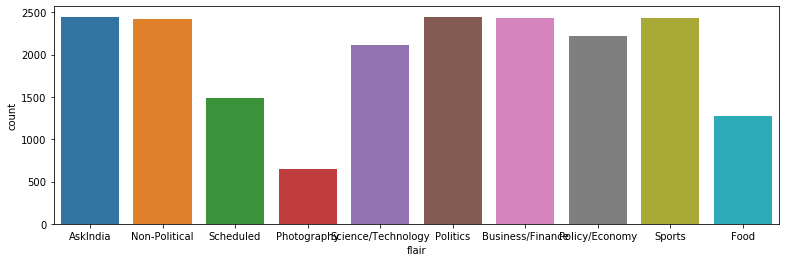

In [55]:
plt.figure(figsize=(13,4))
sns.countplot(x='flair',data=df)

But here we see an imbalanced data. So to balance it, we go back to out gathering data notebook, and create a balanced 
dataset. We stored it in corrected_dataset.csv, so now we analyse our new dataset.

In [56]:
df=pd.read_csv('corrected_dataset.csv')

In [57]:
df.head()

,Unnamed: 0,author,comments,domain,flair,score,text,title,url
0,7995,newlankanews,NaN,newlankanews.com,Scheduled,1,NaN,பெண் அதிகாரி குளிப்பதை பார்ப்பதற்காக சி.சி.டி....,http://www.newlankanews.com/archives/20704
1,2728,PuneriPerson,\nThe single biggest minus point about Indian ...,self.india,Scheduled,163,This experiment has been adopted intermittentl...,Will India (and our highly questionable work c...,https://www.reddit.com/r/india/comments/drbswn...
2,9904,ias_wannabe,So I'm in my 3rd year of engineering. Thinking...,self.india,Scheduled,6,"#IAS Preparation Thread \#12\n\n***\n\nSo, how...",IAS Preparation Thread 12,https://www.reddit.com/r/india/comments/400qso...
3,6133,avinassh,It is great to see these threads getting tract...,self.india,Scheduled,98,As discussed [here](https://np.reddit.com/r/in...,Biweekly career and hiring thread - 24/02/2016,https://www.reddit.com/r/india/comments/5vyfff...
4,2713,The_andh_bhakth,\nThis is beyond petty.\n> The inclusion of a ...,twitter.com,Scheduled,305,NaN,Delhi Govt Sources: Names of CM Arvind Kejriwa...,https://twitter.com/ANI/status/123109390051893...


In [59]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [60]:
df.head()

,author,comments,domain,flair,score,text,title,url
0,newlankanews,NaN,newlankanews.com,Scheduled,1,NaN,பெண் அதிகாரி குளிப்பதை பார்ப்பதற்காக சி.சி.டி....,http://www.newlankanews.com/archives/20704
1,PuneriPerson,\nThe single biggest minus point about Indian ...,self.india,Scheduled,163,This experiment has been adopted intermittentl...,Will India (and our highly questionable work c...,https://www.reddit.com/r/india/comments/drbswn...
2,ias_wannabe,So I'm in my 3rd year of engineering. Thinking...,self.india,Scheduled,6,"#IAS Preparation Thread \#12\n\n***\n\nSo, how...",IAS Preparation Thread 12,https://www.reddit.com/r/india/comments/400qso...
3,avinassh,It is great to see these threads getting tract...,self.india,Scheduled,98,As discussed [here](https://np.reddit.com/r/in...,Biweekly career and hiring thread - 24/02/2016,https://www.reddit.com/r/india/comments/5vyfff...
4,The_andh_bhakth,\nThis is beyond petty.\n> The inclusion of a ...,twitter.com,Scheduled,305,NaN,Delhi Govt Sources: Names of CM Arvind Kejriwa...,https://twitter.com/ANI/status/123109390051893...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22287 entries, 0 to 22286
Data columns (total 8 columns):
author      22287 non-null object
comments    16418 non-null object
domain      22287 non-null object
flair       22287 non-null object
score       22287 non-null int64
text        9125 non-null object
title       22287 non-null object
url         22287 non-null object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


Here too  we can see that there are many posts that do not have text. Therefore, it is probable that text is not a really good attribute to classify the flair on. Also, comments has a similar case.
The author is a proper noun and can hardly be expected to useful in contributing to detect the flairs.
But every submission has a title and url, which can be useful.

In [62]:
 df.describe()

,score
count,22287.000000
mean,52.163279
std,337.997437
min,0.000000
25%,1.000000
50%,6.000000
75%,27.000000
max,17875.000000


Adding textlength and titlelength to dataframe

In [64]:
df['text_len']=df['text'].apply(str).apply(len)
df['title_len']=df['title'].apply(str).apply(len)

Visualising the data

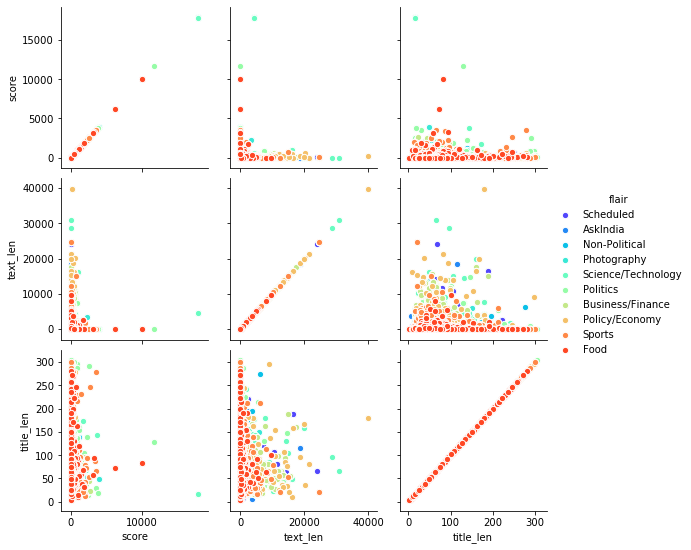

In [65]:
g = sns.PairGrid(df,hue='flair',palette='rainbow')
g=g.map(plt.scatter,edgecolor="w", s=40)
g=g.add_legend()

Grouping the data by flairs

In [66]:
df.groupby('flair').describe()

score                                                 \
                     count        mean         std  min  25%   50%    75%   
flair                                                                       
AskIndia            2442.0   32.074120  511.083303  0.0  1.0   5.0  16.00   
Business/Finance    2433.0   31.290588  109.141155  0.0  1.0   3.0  25.00   
Food                1873.0  108.364122  522.381063  0.0  1.0  11.0  57.00   
Non-Political       2416.0   28.803808   87.932854  0.0  1.0   5.0  21.00   
Photography         1872.0   77.611111  299.718666  0.0  1.0   9.0  33.00   
Policy/Economy      2220.0   31.254054   82.185160  0.0  1.0   8.0  29.00   
Politics            2448.0   75.623366  346.734783  0.0  1.0   6.0  35.25   
Scheduled           2034.0   38.202557  116.645044  0.0  2.0   8.0  33.00   
Science/Technology  2117.0   50.529523  562.176246  0.0  1.0   5.0  25.00   
Sports              2432.0   62.121299  258.789378  0.0  1.0   4.0  23.00   

                            text_len              ...                   \
                        max    count        mean  ...     75%      max   
flair                                             ...                    
AskIndia            17866.0   2442.0  415.789926  ...  478.75  18557.0   
Business/Finance     2622.0   2433.0  789.897246  ...    9.00  39826.0   
Food                10047.0   1873.0  176.131874  ...    9.00   9688.0   
Non-Political        1596.0   2416.0  154.092301  ...    9.00  39826.0   
Photography          3953.0   1872.0  445.268697  ...  404.00  11928.0   
Policy/Economy       2015.0   2220.0  351.416667  ...    9.00  39826.0   
Politics            11712.0   2448.0  164.302288  ...    3.00  14750.0   
Scheduled            2603.0   2034.0  870.234022  ...  627.00  24574.0   
Science/Technology  17875.0   2117.0  444.896552  ...    9.00  30927.0   
Sports               3542.0   2432.0  214.954359  ...    9.00  24574.0   

                   title_len                                                  \
                       count       mean        std   min    25%   50%    75%   
flair                                                                          
AskIndia              2442.0  67.812039  36.016933   4.0  43.00  61.0  82.75   
Business/Finance      2433.0  67.628442  33.597573   3.0  49.00  63.0  77.00   
Food                  1873.0  70.675921  43.679732   3.0  44.00  61.0  85.00   
Non-Political         2416.0  70.956954  37.679742   3.0  47.75  64.5  85.00   
Photography           1872.0  62.697650  43.418088   6.0  36.00  52.0  76.00   
Policy/Economy        2220.0  79.481532  43.574845  10.0  56.00  69.0  88.00   
Politics              2448.0  78.651144  42.804743   5.0  56.00  71.0  89.00   
Scheduled             2034.0  69.112586  37.642304   4.0  47.00  65.0  84.00   
Science/Technology    2117.0  70.634388  35.482557   6.0  49.00  65.0  84.00   
Sports                2432.0  70.944079  35.850565   4.0  50.00  66.0  83.00   

                           
                      max  
flair                      
AskIndia            298.0  
Business/Finance    298.0  
Food                280.0  
Non-Political       286.0  
Photography         299.0  
Policy/Economy      299.0  
Politics            304.0  
Scheduled           290.0  
Science/Technology  297.0  
Sports              300.0  

[10 rows x 24 columns]

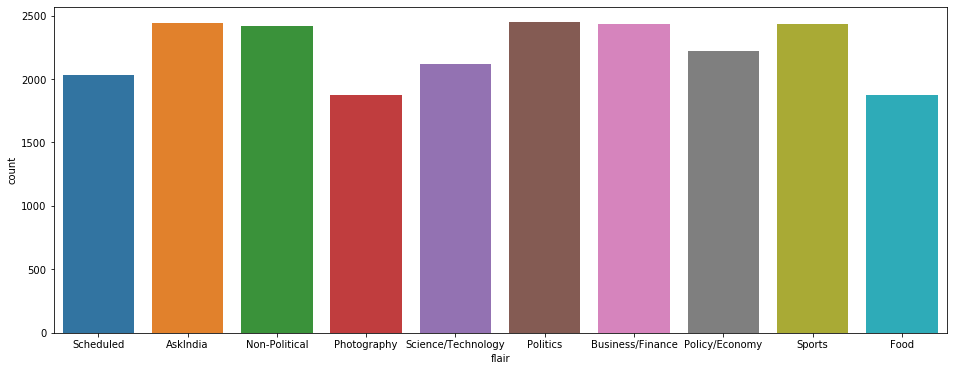

In [74]:
plt.figure(figsize=(16,6))
sns.countplot(x='flair',data=df)

In [75]:
df['text_len']=df['text'].apply(str).apply(len)
df['title_len']=df['title'].apply(str).apply(len)

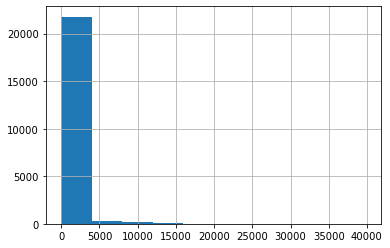

In [79]:
df['text_len'].hist()

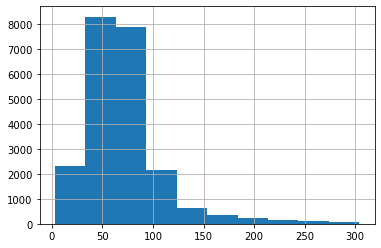

In [77]:
df['title_len'].hist()

We now move to apply the ML classification algorithms to data.